In [1]:
#!pip install mpl_finance
#!pip install --upgrade mplfinance

In [2]:
# First import the libraries that we need to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
from datetime import datetime

In [3]:
#The data was downloaded from yahoo in the following link: https://finance.yahoo.com/quote/BTC-USD/history/
#The date has to be manually changed on the website to obtain all the possible data
url = 'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1=1410912000&period2=1634515200&interval=1d&events=history&includeAdjustedClose=true'
bc = pd.read_csv(url)
bc

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,2.105680e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
...,...,...,...,...,...,...,...
2584,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10
2585,2021-10-15,57345.902344,62757.128906,56868.144531,61593.949219,61593.949219,5.178008e+10
2586,2021-10-16,61609.527344,62274.476563,60206.121094,60892.179688,60892.179688,3.425096e+10
2587,2021-10-17,60887.652344,61645.523438,59164.468750,61553.617188,61553.617188,2.903237e+10


In [4]:
bc.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [5]:
print(bc[bc.isna().any(axis=1)])

            Date  Open  High  Low  Close  Adj Close  Volume
2039  2020-04-17   NaN   NaN  NaN    NaN        NaN     NaN
2214  2020-10-09   NaN   NaN  NaN    NaN        NaN     NaN
2217  2020-10-12   NaN   NaN  NaN    NaN        NaN     NaN
2218  2020-10-13   NaN   NaN  NaN    NaN        NaN     NaN


In [6]:
#Only 5 days did not have any information, it is easier to just drop those rows
bc = bc.dropna()
print(bc)

            Date          Open          High           Low         Close  \
0     2014-09-17    465.864014    468.174011    452.421997    457.334015   
1     2014-09-18    456.859985    456.859985    413.104004    424.440002   
2     2014-09-19    424.102997    427.834991    384.532013    394.795990   
3     2014-09-20    394.673004    423.295990    389.882996    408.903992   
4     2014-09-21    408.084991    412.425995    393.181000    398.821014   
...          ...           ...           ...           ...           ...   
2584  2021-10-14  57372.832031  58478.734375  56957.074219  57321.523438   
2585  2021-10-15  57345.902344  62757.128906  56868.144531  61593.949219   
2586  2021-10-16  61609.527344  62274.476563  60206.121094  60892.179688   
2587  2021-10-17  60887.652344  61645.523438  59164.468750  61553.617188   
2588  2021-10-18  61548.804688  62614.660156  60012.757813  62026.078125   

         Adj Close        Volume  
0       457.334015  2.105680e+07  
1       424.44000

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2585 entries, 0 to 2588
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2585 non-null   object 
 1   Open       2585 non-null   float64
 2   High       2585 non-null   float64
 3   Low        2585 non-null   float64
 4   Close      2585 non-null   float64
 5   Adj Close  2585 non-null   float64
 6   Volume     2585 non-null   float64
dtypes: float64(6), object(1)
memory usage: 161.6+ KB


In [8]:
bc.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2585.000000,2585.000000,2585.000000,2585.000000,2585.000000,2.585000e+03
mean,9440.183635,9709.107956,9152.887871,9463.208730,9463.208730,1.374584e+10
std,13845.719510,14264.270078,13386.815046,13882.274756,13882.274756,1.989186e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,577.752991,582.817993,573.429993,577.502991,577.502991,7.406470e+07
50%,5505.552246,5642.044434,5347.645996,5526.640137,5526.640137,4.566910e+09
75%,9698.502930,9908.796875,9507.637695,9700.414063,9700.414063,2.219800e+10
max,63523.753906,64863.097656,62208.964844,63503.457031,63503.457031,3.509679e+11


In [9]:
#Creates a new column called 'Return' that is the percentage change from the previous column 
#on the adjusted closing price
bc['Return'] = bc['Adj Close'].pct_change()
bc.head()

<ipython-input-9-19810e2be86c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Return'] = bc['Adj Close'].pct_change()


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-0.071926
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-0.069843
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,0.035735
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-0.024659


Text(0.5, 1.0, 'Opening Price vs. Date')

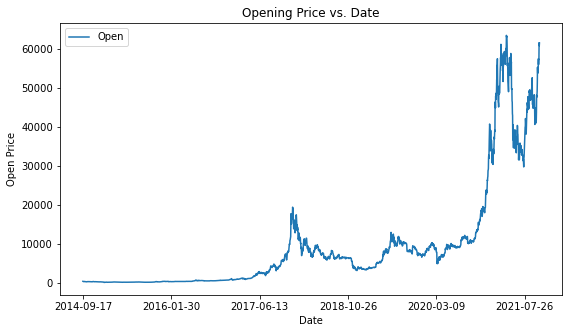

In [10]:
bc.plot('Date', 'Open', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Opening Price vs. Date')

Text(0.5, 1.0, 'Closing Price vs. Date')

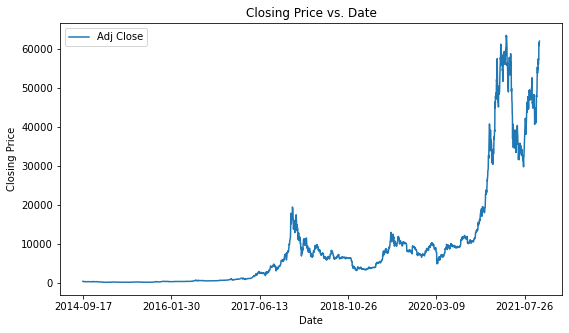

In [11]:
bc.plot('Date', 'Adj Close', figsize = (9,5))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price vs. Date')

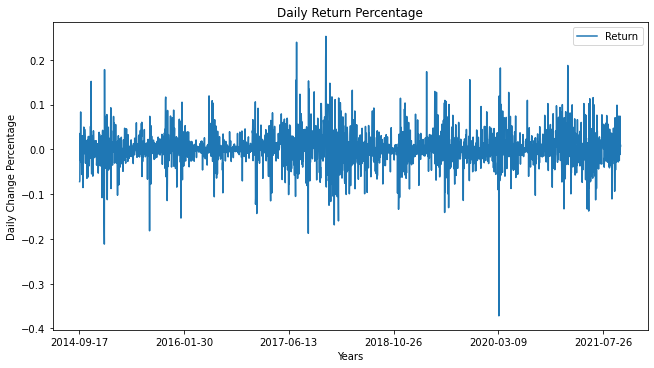

In [12]:
bc.plot('Date', 'Return', figsize=(9,5))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Daily Change Percentage')
plt.title("Daily Return Percentage")
plt.show()

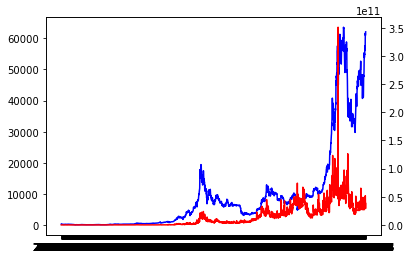

In [13]:
fig, ax = plt.subplots()
ax.plot(bc['Date'], bc['Adj Close'], color = 'blue')
ax2 = ax.twinx()
ax2.plot(bc['Date'], bc['Volume'], color = 'red')
plt.show()

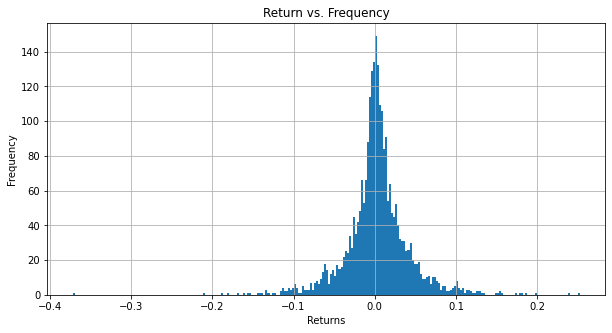

In [14]:
bc.hist('Return', bins = 250, figsize = (10,5))
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Return vs. Frequency')
plt.show()

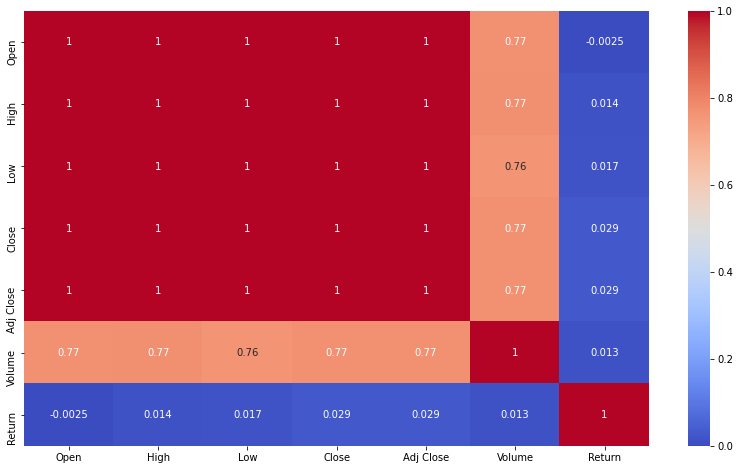

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(bc.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True);

From the heat map, the main attribute of test will be Volume. 

array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Return'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

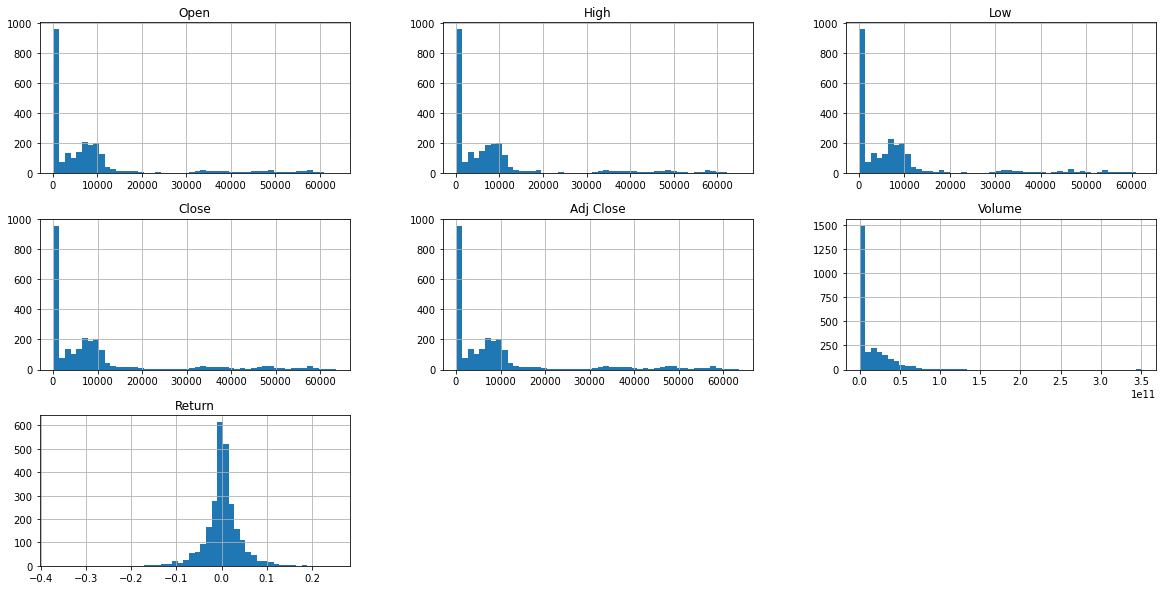

In [16]:
bc.hist(bins = 50, figsize = (20,10))

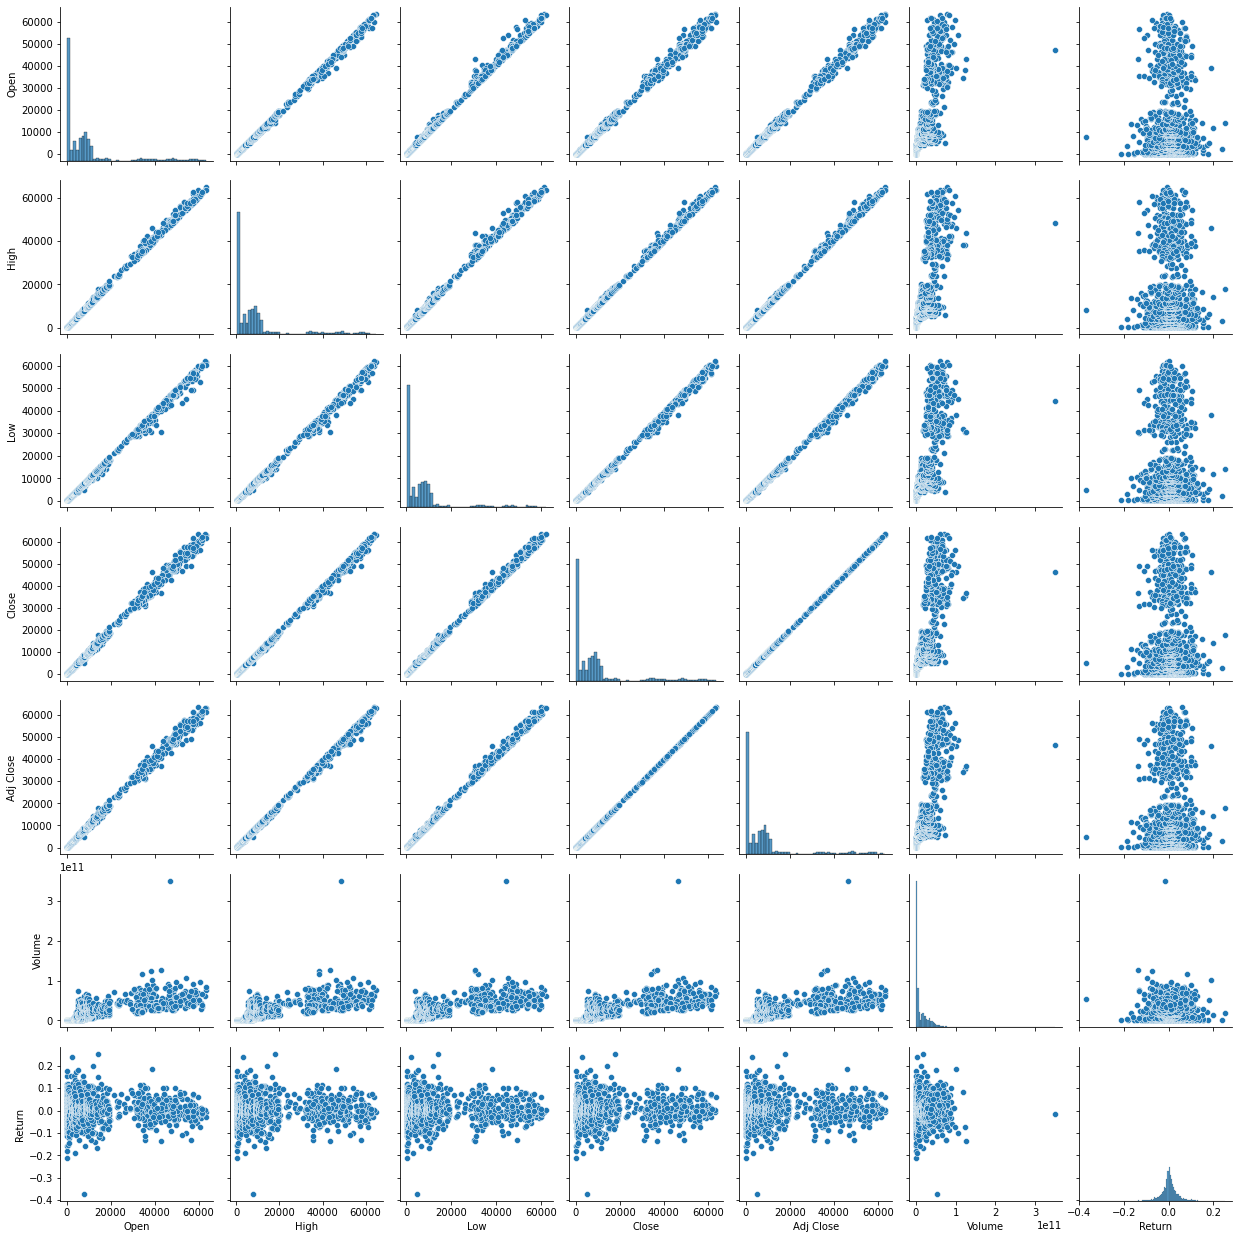

In [17]:
sns.pairplot(bc)

<AxesSubplot:ylabel='Density'>

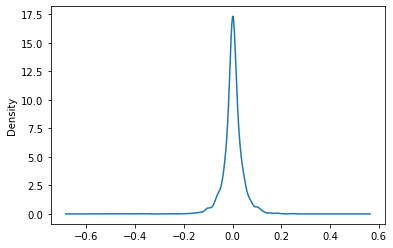

In [18]:
bc['Return'].plot(kind = 'kde')

<AxesSubplot:ylabel='Density'>

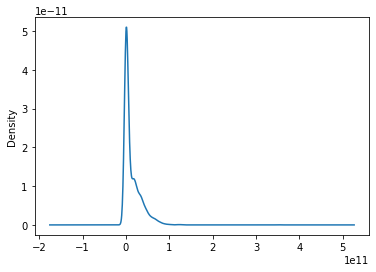

In [19]:
bc['Volume'].plot(kind = 'kde')

C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\falda\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:>

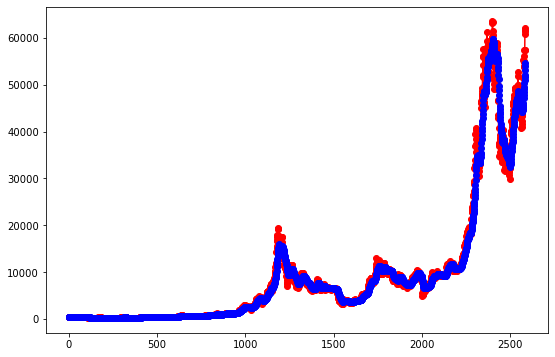

In [20]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(bc['Adj Close']).fit(smoothing_level = 0.1, optimized = False)

bc['Adj Close'].plot(marker = 'o', color = 'red', figsize = (9,6))
model.fittedvalues.plot(marker = 'o', color ='blue')

The model line is a really good fit for the data. Further statsmodels prediction can be done with Arima

In [21]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

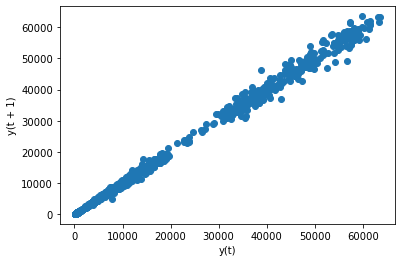

In [22]:
lag_plot(bc['Adj Close'])

This shows that the data are strongly non-random and further suggests that an autoregressive model might be appropriate. The tighter the data is clustered around the diagonal, the more autocorrelation is present.

A stationary time series is one whose properties do not depend on the time at which the series is observed. Bitcoin value varies to highly due to multiple factors such as social medica and government policy. 

In [23]:
#Create a column to return the day of the week matching the date

bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
week={0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)

bc.head()

<ipython-input-23-4d40445701f7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared
<ipython-input-23-4d40445701f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Day of Week'] = bc['Date'].dt.dayofweek.map(week)


,Date,Open,High,Low,Close,Adj Close,Volume,Return,Day of Week
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0,NaN,Wed
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0,-0.071926,Thu
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0,-0.069843,Fri
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0,0.035735,Sat
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0,-0.024659,Sun


A positive linear trend is suggestive of positive autocorrelation.
The tighter the data is clustered around the diagonal, the more autocorrelation is present.

<ipython-input-24-54277c87aac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared


<AxesSubplot:xlabel='Day of Week', ylabel='count'>

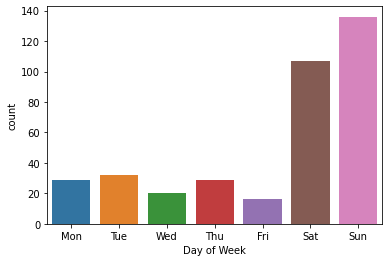

In [24]:
bc['Date'] = pd.to_datetime(bc['Date']) #Had to redo otherwise errors appeared

# count min value for each week day
idx = bc.groupby([pd.Grouper(key='Date', freq='W-MON')])['Volume'].transform(min) == bc['Volume']

# calculate data for days.
# W-MON = weekly frequency (Mondays)
lows_count = bc[idx].groupby([pd.Grouper(key='Date', freq='D')]).first().reset_index()
lows_count = lows_count.dropna()


sns.countplot(x='Day of Week',data=lows_count, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

I wanted to see which days had the largest trading volumes, and we see that those days are Saturday and Sunday

In [25]:
import mplfinance as mpf

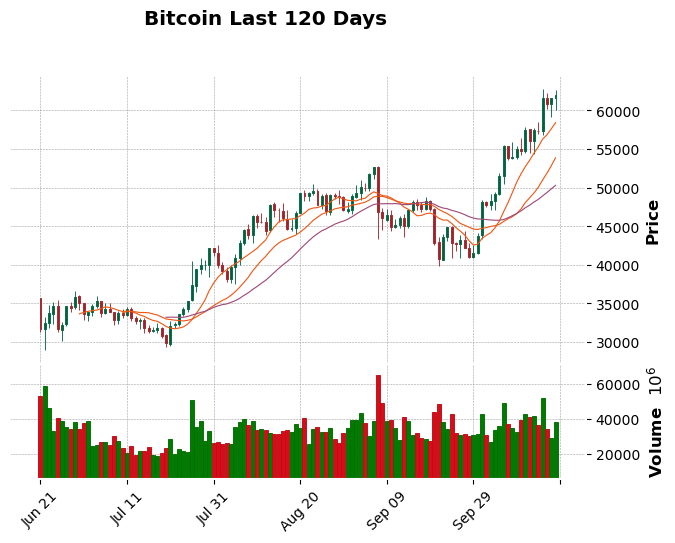

In [26]:
#Limit data so that it becomes easier to see
mpf.plot(bc.set_index('Date').tail(120), 
        type='candle', style='charles', volume=True, 
        title='Bitcoin Last 120 Days', mav=(10,20,30)) #moving average

From the last 120 days, we see the price continues to fluctuate. A decrease in price occurred during the month of September 2021 and has since been on the rise again. 

# Pre-processing & Training Data Development

In [27]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Prophet 0.7.1


In [47]:
from pandas import to_datetime
from fbprophet import Prophet
import datetime
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric

In [40]:
bc_date_adjclose = bc[['Date', 'Adj Close']]
bc_date_adjclose.columns = ['ds', 'y']
#bc_date_adjclose['ds']= to_datetime(bc_date_adjclose['ds'])
# define the model
model = Prophet(daily_seasonality=True)
# fit the model
model.fit(bc_date_adjclose)

In [41]:
future = model.make_future_dataframe(periods=100,freq='D')
forecast = model.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,410.081270,-7891.028970,2966.755278,410.081270,410.081270,-2600.004150,-2600.004150,-2600.004150,-176.430987,...,-13.326802,-13.326802,-13.326802,-2410.246361,-2410.246361,-2410.246361,0.0,0.0,0.0,-2189.922880
1,2014-09-18,410.341437,-7339.058310,3080.821089,410.341437,410.341437,-2668.478634,-2668.478634,-2668.478634,-176.430987,...,-34.323013,-34.323013,-34.323013,-2457.724634,-2457.724634,-2457.724634,0.0,0.0,0.0,-2258.137197
2,2014-09-19,410.601604,-7753.480400,3151.211025,410.601604,410.601604,-2626.087249,-2626.087249,-2626.087249,-176.430987,...,47.887957,47.887957,47.887957,-2497.544220,-2497.544220,-2497.544220,0.0,0.0,0.0,-2215.485645
3,2014-09-20,410.861772,-7918.384671,3484.269890,410.861772,410.861772,-2681.169394,-2681.169394,-2681.169394,-176.430987,...,24.418670,24.418670,24.418670,-2529.157078,-2529.157078,-2529.157078,0.0,0.0,0.0,-2270.307622
4,2014-09-21,411.121939,-7999.842546,3581.249036,411.121939,411.121939,-2732.928729,-2732.928729,-2732.928729,-176.430987,...,-4.388977,-4.388977,-4.388977,-2552.108765,-2552.108765,-2552.108765,0.0,0.0,0.0,-2321.806790


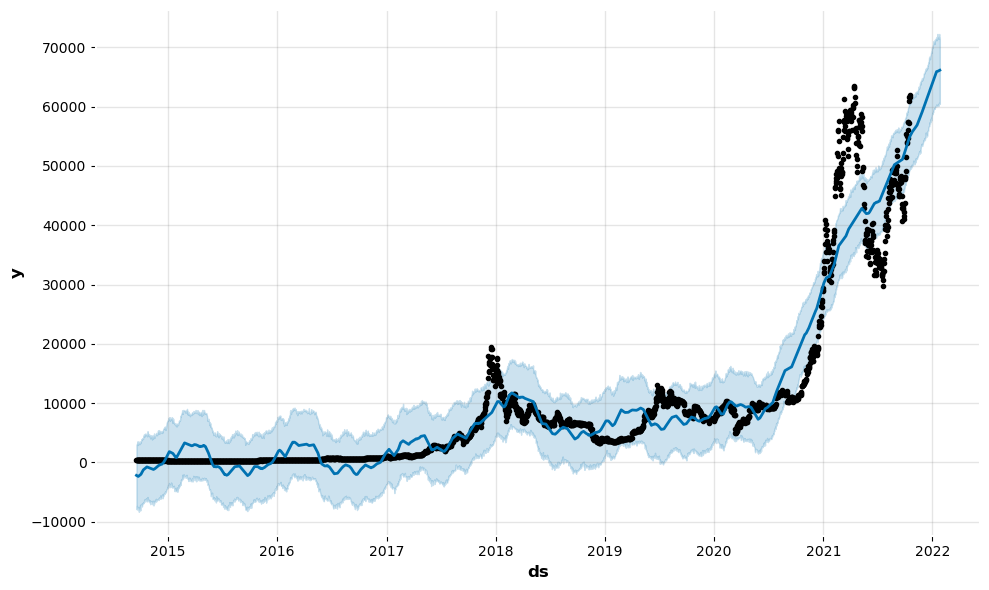

In [42]:
plot1 = model.plot(forecast)

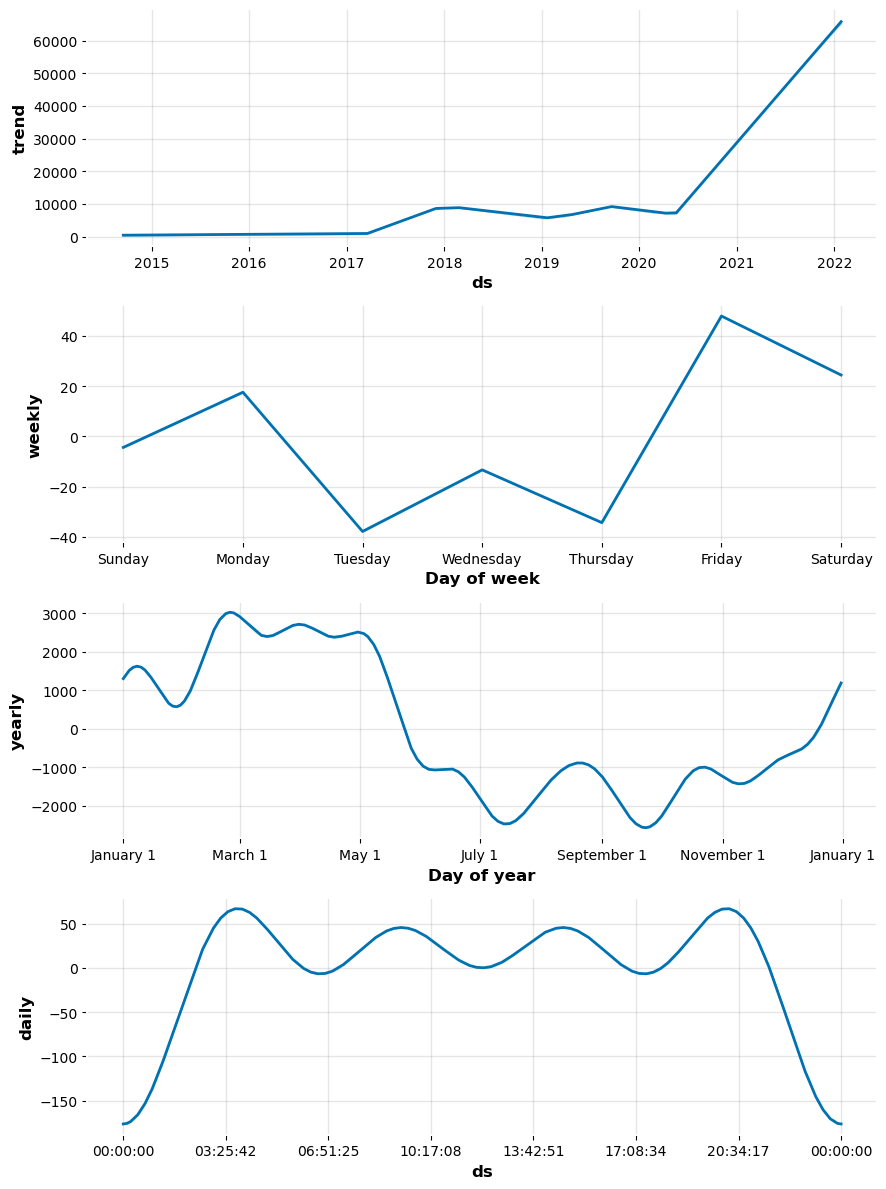

In [43]:
plt2 = model.plot_components(forecast)

In [44]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2680,2022-01-22,66006.990330,60324.746517,71425.059437
2681,2022-01-23,66006.907208,60655.373254,71861.248438
2682,2022-01-24,66066.807615,60540.913104,72262.100871
2683,2022-01-25,66060.242313,60558.510753,71482.505330
2684,2022-01-26,66145.919391,60461.726482,71645.633926


          ds          yhat    yhat_lower    yhat_upper
0 2021-10-01  52255.429884  46403.460765  57764.500986
1 2021-10-02  52398.012688  46799.707739  58278.846376
2 2021-10-03  52540.273253  46983.627909  58289.296325
3 2021-10-04  52737.349171  47518.103389  58492.314116
4 2021-10-05  52860.117318  47453.864205  58099.543669


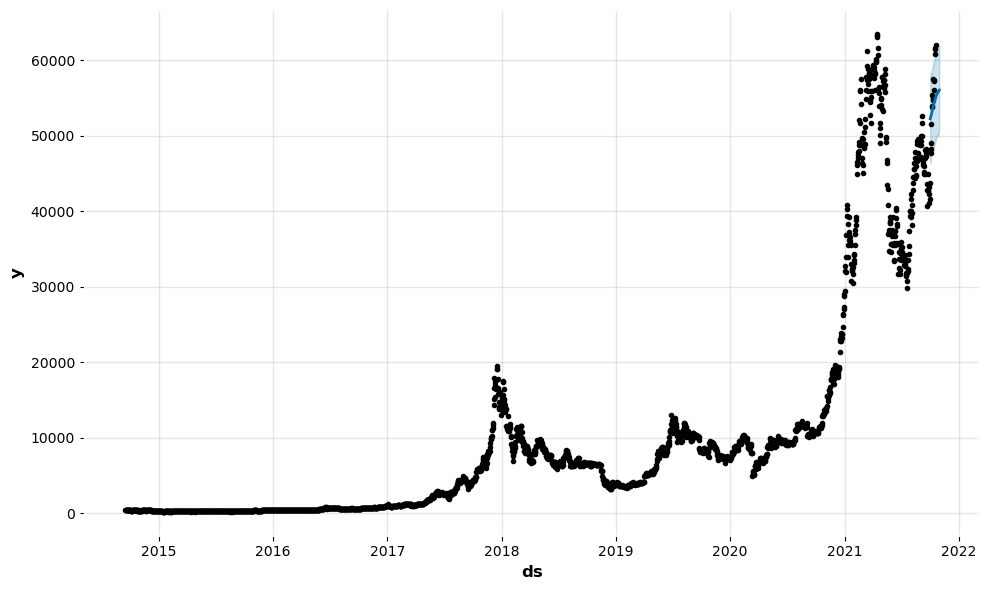

In [33]:
# define the period for which we want a prediction
#prediction over last 12 months
future = list()
for i in range(1, 31):
	date = '2021-10-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

In [34]:
from sklearn.metrics import mean_absolute_error

MAE: 6053.037


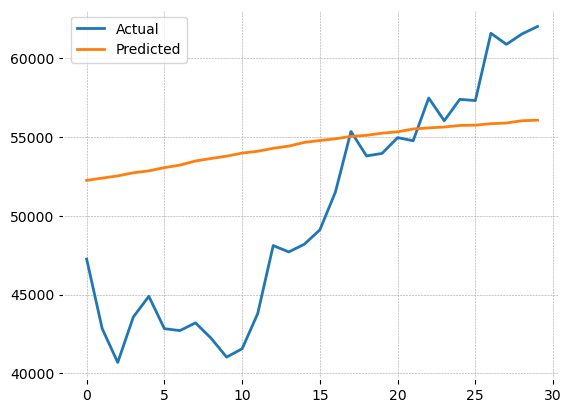

In [35]:
# calculate MAE between expected and predicted values
y_true = bc_date_adjclose['y'][-30:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

You may have noticed in the earlier examples in this documentation that real time series frequently have abrupt changes in their trajectories. By default, Prophet will automatically detect these changepoints and will allow the trend to adapt appropriately.

https://facebook.github.io/prophet/docs/trend_changepoints.html#automatic-changepoint-detection-in-prophet

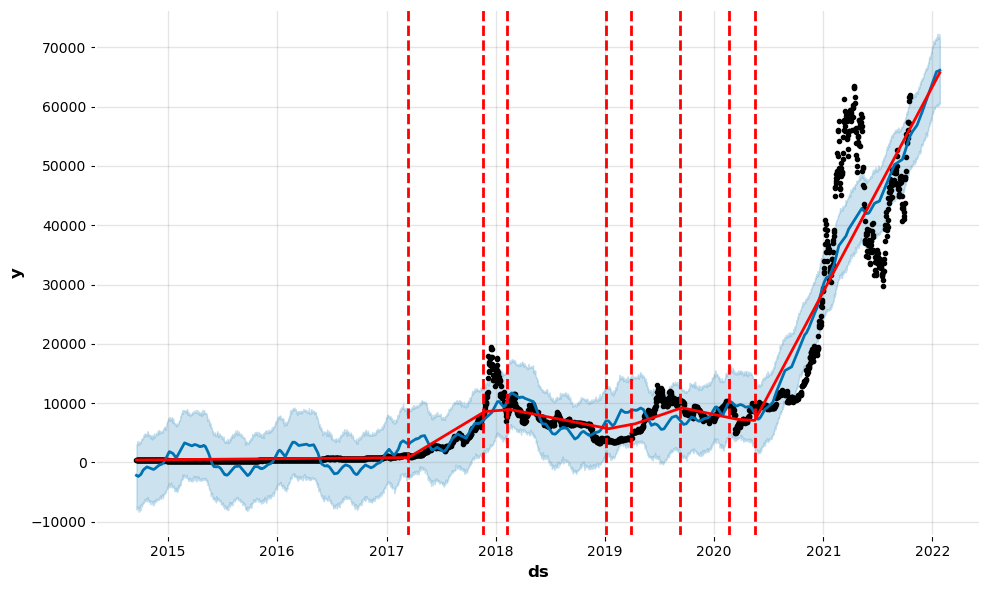

In [48]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexibility), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible:

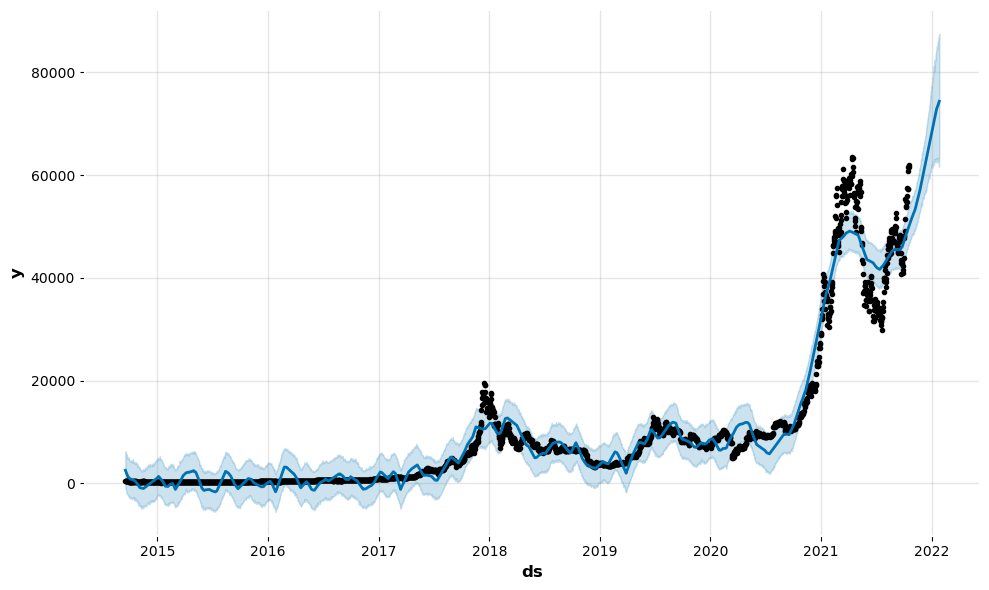

In [53]:
m = Prophet(changepoint_prior_scale=0.7, daily_seasonality = True)
forecast = m.fit(bc_date_adjclose).predict(future)
fig = m.plot(forecast)

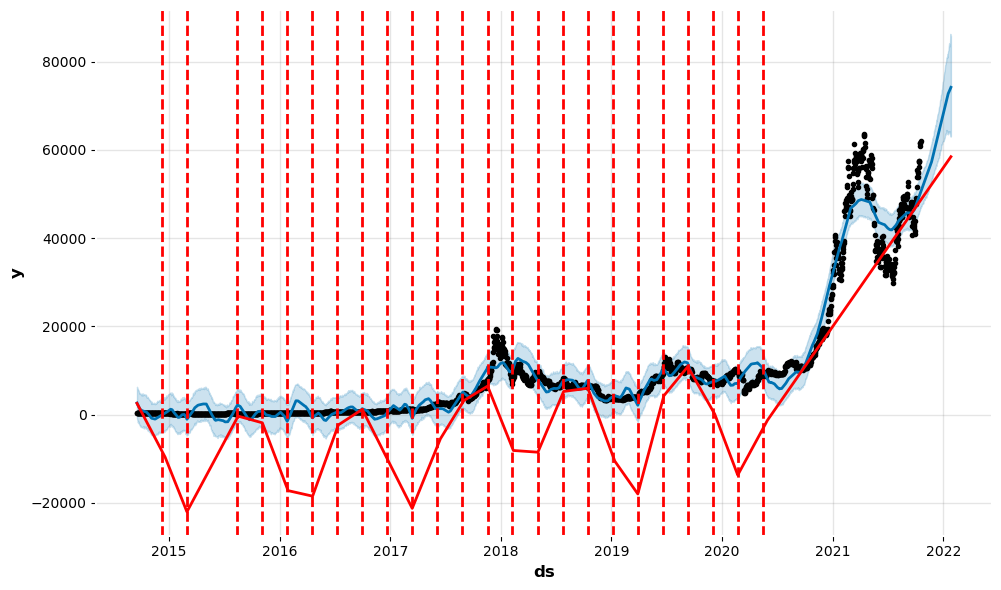

In [51]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point.

This cross validation procedure can be done automatically for a range of historical cutoffs using the cross_validation function. We specify the forecast horizon (horizon), and then optionally the size of the initial training period (initial) and the spacing between cutoff dates (period).

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), median absolute percent error (MDAPE) and coverage of the yhat_lower and yhat_upper estimates.

In [55]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Making 9 forecasts with cutoffs between 2016-11-08 00:00:00 and 2020-10-18 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,7.125241e+06,2669.314728,1703.221591,0.193204,0.175724,0.221203
1,38 days,7.691944e+06,2773.435500,1771.211228,0.199581,0.179047,0.214067
2,39 days,8.192720e+06,2862.292852,1835.324731,0.206215,0.182566,0.204893
3,40 days,8.629857e+06,2937.661766,1895.891305,0.212672,0.185171,0.201835
4,41 days,9.101918e+06,3016.938448,1957.897868,0.219119,0.187087,0.199796


In [58]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-11-09,715.152008,692.597651,736.867514,723.273010,2016-11-08
1,2016-11-10,715.862320,692.898734,738.130754,715.533997,2016-11-08
2,2016-11-11,716.130979,695.439494,740.064466,716.411011,2016-11-08
3,2016-11-12,715.839237,693.471255,736.529657,705.054016,2016-11-08
4,2016-11-13,714.576505,691.857038,736.712189,702.031006,2016-11-08


Cross validation performance metrics can be visualized with plot_cross_validation_metric, here shown for MAPE. Dots show the absolute percent error for each prediction in df_cv. The blue line shows the MAPE, where the mean is taken over a rolling window of the dots.

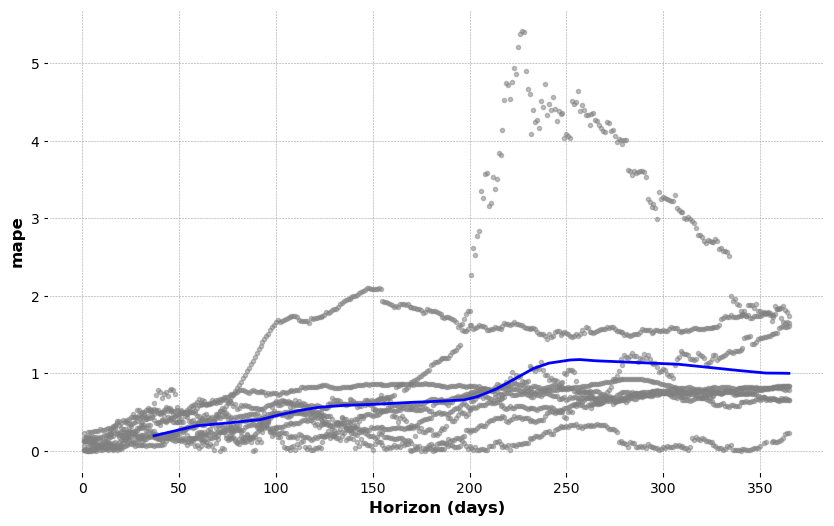

In [56]:
fig = plot_cross_validation_metric(df_cv, metric='mape')